# Eploratory Data Analysis

## Part 1: IRIS data

In [364]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

url_1 = "https://raw.githubusercontent.com/mt4007-ht23/data/main/IRIS.csv"

IRIS = pd.read_csv(url_1)# count 150 observations

### Question 1:  What can we say about the relationship given the figures?

We observe relationships or correlations between the dimensions of sepals and petals. However, these correlations depend on the species.

For the species Iris-setosa: It is evident from both figures that there is no clear correlation between the length and width of sepals and the length and width of petals. This is observed as the x-axis remains horizontal, indicating neither an increase nor a decrease concerning the y-axis.

For the species Iris-versicolor and Iris-virginica: Clear positive linear correlations are observed between the length and width of sepals and the length and width of petals.

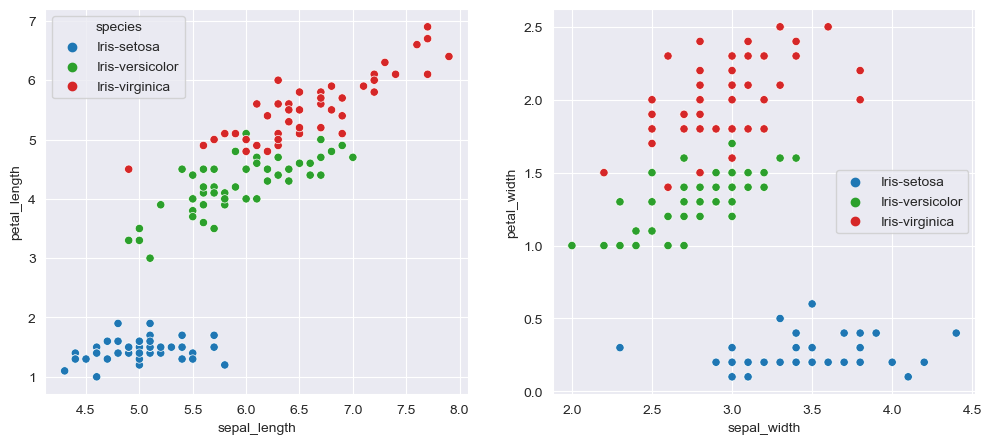

In [365]:
# specify colors using the 'palette' parameter， and choose the color according to the example.  
custom_palette = {'Iris-setosa': 'tab:blue', 'Iris-versicolor': 'tab:green', 'Iris-virginica': 'tab:red'}

# Set the seaborn style to 'darkgrid' for a plaid background
sns.set_style("darkgrid")

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=IRIS, palette=custom_palette)
plt.subplot(1, 2, 2)
sns.scatterplot(x="sepal_width", y="petal_width", hue="species", data=IRIS, palette=custom_palette)
plt.legend(loc="center right")
plt.show()

### Question 2: How are the sepal and petal dimensions distributed? 

They are distributed quite differently. For example, the width of the sepals in Iris-setosa is widely spread and symmetric, unlike Iris-versicolor and Iris-virginica. Additionally, they exhibit different mean values. We cannot reach a direct conclusion here; it depends on what aspect we are interested in.

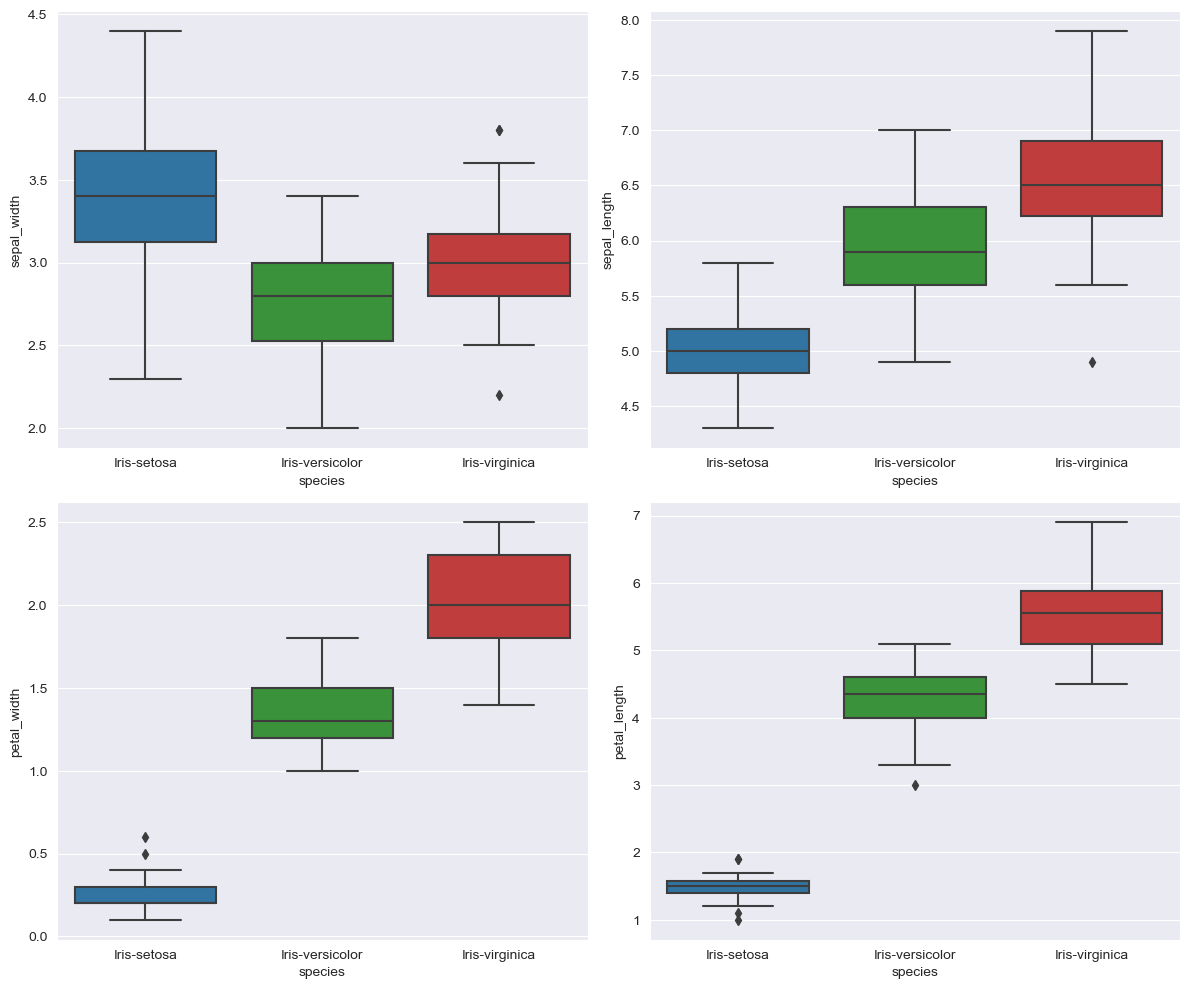

In [366]:
# Create a subplot with 2 row and 2 columns according to the example.
plt.figure(figsize=(12, 10)) 
plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_width",  data=IRIS, palette=custom_palette)
plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_length",  data=IRIS, palette=custom_palette)
plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_width",  data=IRIS, palette=custom_palette)
plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_length",  data=IRIS, palette=custom_palette)
plt.tight_layout()
plt.show()

### Question 3: How are the different variables related to each other? 
From the plot below, we observe a strong positive correlation between the variables petal_length and petal_width across all three species. In other words, all three species exhibit this characteristic, indicating that longer petals tend to have greater width, showing a positive correlation between these two variables. However, this relationship is not as pronounced for the other pairs of variables. 
Additionally, the diagonal axes illustrate the univariate distributions of each individual variable.

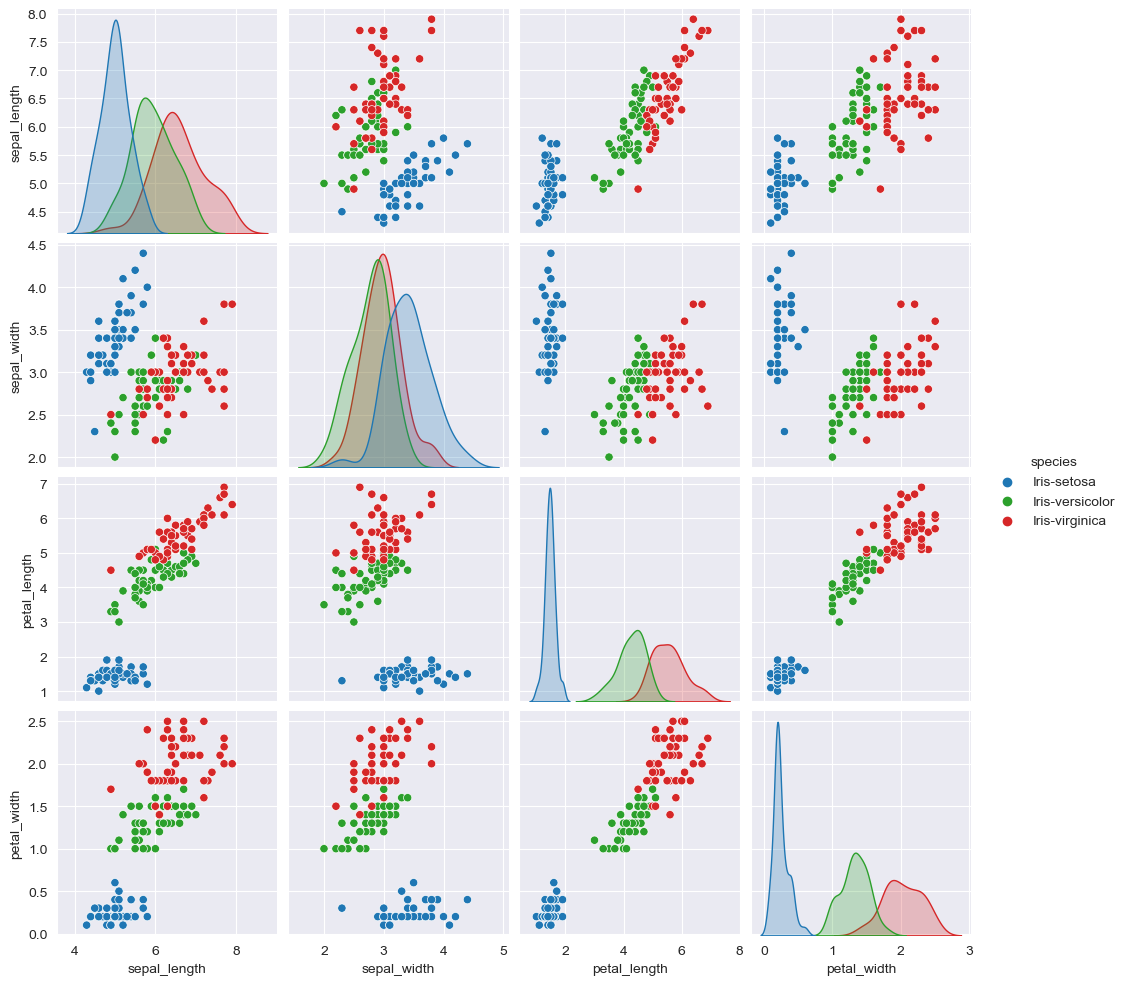

In [367]:
## create a pairwise plot.
sns.pairplot(IRIS,hue="species", palette=custom_palette)
plt.show()

## Part 2: Birdwatching

### Question 1: What are the most prevelant species?
We can see from the output below that 'Koltrast' is the species that appears most frequently, with 718 observations in the dataset.


In [368]:
url_2 = "https://raw.githubusercontent.com/mt4007-ht23/data/main/artportalen.csv"
birdSightings = pd.read_csv(url_2, parse_dates=['Startdatum', 'Slutdatum'] )

In [379]:
# we group the dataset by "Artnamn" to check the frequency of different bird species.
birdSightings_grouped = birdSightings.groupby("Artnamn").size().reset_index(name='Count')
sorted_birdSightings1 = birdSightings_grouped.sort_values(by='Count', ascending=False)
print(sorted_birdSightings1.head().to_markdown(index=False))

| Artnamn    |   Count |
|:-----------|--------:|
| Koltrast   |     718 |
| Talgoxe    |     631 |
| Blåmes     |     629 |
| Gräsand    |     531 |
| Storskrake |     522 |


### Question 2: What is the monthly distribution of the top 3 most prevelant species
We can observe that the top three most prevalent species show variation across different months.

In [370]:
# convert the type from object to time. 
birdSightings['Month'] = birdSightings['Startdatum'].dt.month

# Group by 'Month' and 'Artnamn' and calculate the count
monthly_distribution = birdSightings.groupby(['Month', 'Artnamn']).size().reset_index(name='Count')

# Find the top 3 species for each month
top_species_by_month = monthly_distribution.sort_values(['Month', 'Count'], ascending=[True, False])\
.groupby('Month').head(3)
print(top_species_by_month.to_markdown(index=False))

|   Month | Artnamn               |   Count |
|--------:|:----------------------|--------:|
|       1 | Koltrast              |     155 |
|       1 | Blåmes                |     147 |
|       1 | Talgoxe               |     144 |
|       2 | Talgoxe               |     119 |
|       2 | Blåmes                |     115 |
|       2 | Koltrast              |     105 |
|       3 | Skogsduva             |     179 |
|       3 | Ringduva              |     145 |
|       3 | Blåmes                |     131 |
|       4 | Vitkindad gås         |     143 |
|       4 | Gräsand               |     132 |
|       4 | Skäggdopping          |     129 |
|       5 | Svarthätta            |     214 |
|       5 | Svartvit flugsnappare |     198 |
|       5 | Grönsångare           |     190 |
|       6 | Mindre flugsnappare   |      55 |
|       6 | Svartvit flugsnappare |      54 |
|       6 | Koltrast              |      50 |
|      12 | Skata                 |       1 |


### Question 3: What are the rarest species?
In order to answer this question, we need to find the species with the lowest observations and the lowest number according to the 'Antal' column. From the first block of the code, we can see that a 'Artnamn' disappears when we drop all the NA values in the 'Antal' column. This indicates that 'Ob. korsnäbb' has observations, but all the observations are NA values in the 'Antal' column.

In the second block of the code, we check the observations of 'Ob. korsnäbb' in the original data set, which shows that there is only one observation, and the 'Antal' is NA. We can conclude that 'Ob. korsnäbb' is the rarest species.

To verify our answer, we can run the code in the third block. From the output, we can see that there are dozens of species that have only 1 "Antal". They could also be the rarest species because the NA value for 'Ob. korsnäbb' could be 1 or more.

In the end, we can say that the rarest species could be 'Ob. korsnäbb,' Strömstare, Trädlärka, and all the species which have 1 value in the 'RarestSpecies' dataset below.

In [371]:
# The first block
# check the number of species in the original dataset 
test1 = birdSightings["Artnamn"].unique()

# drop the rows which has NA values in "Antal" column
birdSightings['Antal'] = pd.to_numeric(birdSightings['Antal'], errors='coerce')
birdSightings_dropna = birdSightings.dropna(subset=['Antal'])

# check the number of species in the dataset where NA values are droped
test2 = birdSightings_dropna["Artnamn"].unique()

# check if the two sets have the same values
series1 = pd.Series(test1)
series2 = pd.Series(test2)
difference = series1[~series1.isin(series2)]

# Print the differing value
print(difference.values)

['Ob. korsnäbb']


In [372]:
# The second block
# chech the number of records for bird specie "Ob. korsnäbb"
filtered_df = birdSightings[birdSightings["Artnamn"] == "Ob. korsnäbb"]
print(filtered_df.head().to_markdown(index=False))

|       Id |   Taxonsorteringsordning |   Rödlistade | Artnamn      | Vetenskapligt namn   | Auktor         |   Antal |   Ålder/stadium |   Kön | Aktivitet     | Lokalnamn    |   Ostkoordinat |   Nordkoordinat |   Noggrannhet |   Diffusion | Län       | Kommun    | Provins   | Församling   | Startdatum          | Starttid   | Slutdatum           | Sluttid   |   Kommentar |   Biotop | Rapportör   | Observatörer   |   Month |
|---------:|-------------------------:|-------------:|:-------------|:---------------------|:---------------|--------:|----------------:|------:|:--------------|:-------------|---------------:|----------------:|--------------:|------------:|:----------|:----------|:----------|:-------------|:--------------------|:-----------|:--------------------|:----------|------------:|---------:|:------------|:---------------|--------:|
| 97889105 |                    55442 |          nan | Ob. korsnäbb | Loxia                | Linnaeus, 1758 |     nan |             nan |   nan 

In [373]:
# The third block
# group by "Artnamn" and check the number of the total observed birds according to the values from column "Antal"
birdSightings_grouped2= birdSightings_dropna.groupby("Artnamn").sum("Antal")
theRarestSpeces = birdSightings_grouped2.sort_values("Antal", ascending = True).head(20)
print(theRarestSpeces.to_markdown(index=False))

|          Id |   Taxonsorteringsordning |   Antal |   Ostkoordinat |   Nordkoordinat |   Noggrannhet |   Diffusion |   Month |
|------------:|-------------------------:|--------:|---------------:|----------------:|--------------:|------------:|--------:|
| 9.79478e+07 |                    55329 |       1 |    1.62452e+06 |     6.58859e+06 |           584 |           0 |       1 |
| 9.92203e+07 |                    55010 |       1 |    1.63111e+06 |     6.58206e+06 |           206 |           0 |       3 |
| 1.0032e+08  |                    54889 |       1 |    1.63111e+06 |     6.58206e+06 |           206 |           0 |       4 |
| 1.00771e+08 |                    54388 |       1 |    1.62972e+06 |     6.5846e+06  |           142 |           0 |       5 |
| 1.01068e+08 |                    54918 |       1 |    1.62671e+06 |     6.58695e+06 |            50 |           0 |       5 |
| 1.00569e+08 |                    53979 |       1 |    1.63311e+06 |     6.58071e+06 |            94 | 

### Question 4: Generate at least 3 questions on your own and explore the dataset.
1. How many bird species are observed in the dataset?
2. What is the mean value in the 'Antal' column, providing us with the average number of birds observed in a single record?
3. How many different locations or places are recorded in the 'Församling' column?

A brief summary of the questions: There are records of 173 different bird species observed in Stockholm, Solna, Sollentuna, and Lidingö. The average number of birds observed in one record is around 6 birds. 
However, if our interest extends to bird species in all of Sweden, this dataset may not be sufficiently representative. All observations are recorded in the southeastern part of Sweden.

In [374]:
# answer to 4-1
numberSpecies = birdSightings["Artnamn"].unique()
print("The total number of different species in the dataset is",len(numberSpecies),)

# answer to 4-2
meanAntal = birdSightings_dropna["Antal"].mean()
print("The average number of birds observed is",round(meanAntal,2),)

# answer to 4-3
numberLocation = birdSightings["Församling"].unique()
print("The total number of different places is",numberLocation,)

The total number of different species in the dataset is 173
The average number of birds observed is 5.91
The total number of different places is ['Solna' 'Stockholm' 'Sollentuna' 'Lidingö']


## Part 3: Predicting Strokes

The dataset contains records of various individuals who had or or not had a stroke. Numerous pieces of information have been gathered about these individuals. This information may aid us in analyzing the potential causes of strokes and, consequently, help reduce the risk of strokes in the future.

After addressing the three questions I posed, it seems that age and BMI are potentially useful variables for predicting strokes. There appears to be a correlation between these variables and strokes. However, it is not definitive, as I have only examined three variables here. A more comprehensive analysis involving additional variables might provide a better understanding of strokes.

In [375]:
url3 = "https://raw.githubusercontent.com/mt4007-ht23/data/main/stroke-data.csv"
strokeData = pd.read_csv(url3)

### Question 1: What is the distribution of strokes in the dataset? How many individuals had strokes, and how many did not?
To understand the distribution of strokes, refer to the histogram below. According to the attribute information in the dataset, a value of 1 indicates that the patient had a stroke, and 0 indicates the absence of a stroke for the 'stroke' attribute.

The output shows that there are 249 individuals who experienced a stroke and 4861 individuals who did not.

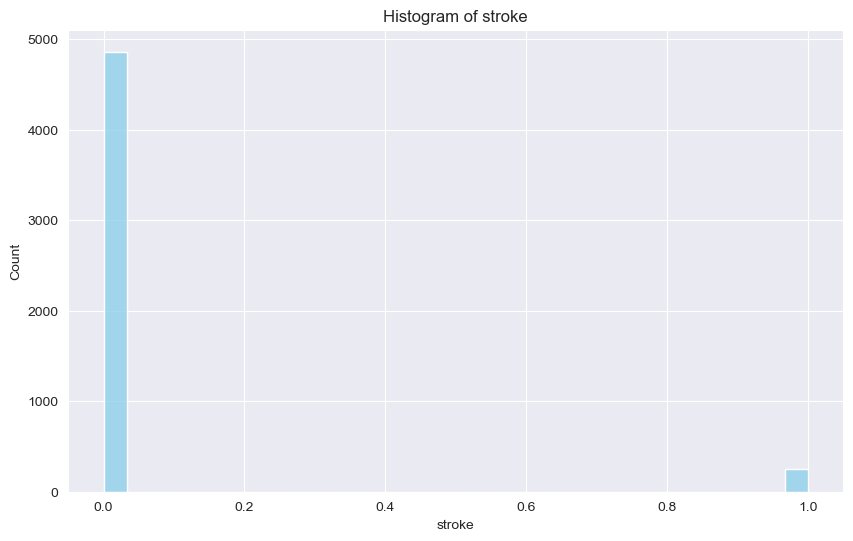

0    4861
1     249
Name: stroke, dtype: int64


In [376]:
# Create a histogram for column stroke
plt.figure(figsize=(10, 6))
sns.histplot(strokeData["stroke"], bins=30, kde=False, color='skyblue')
plt.title(f'Histogram of {"stroke"}')
plt.xlabel("stroke")
plt.ylabel('Count')
plt.show()

#count the values in stroke attribute 
value_counts = strokeData["stroke"].value_counts()
print(value_counts)

### Question 2: Are there any correlations between certain features (e.g., age, gender, BMI) and the likelihood of having a stroke?
Let's conduct a brief analysis of the correlations between age, gender, and BMI. It appears that there are no obvious correlations among them.

The scatter plots exhibit either horizontal or vertical patterns between age, gender, and BMI. This suggests that, irrespective of age changes, the BMI interval remains relatively constant, indicating no significant impact due to age. Similarly, regarding gender, we observe an almost equal distribution of both genders across BMI intervals, with no clear indications of correlation.

Based on the pair plot with strokes, we can observe that most individuals who experienced a stroke are between 40 and 80 years old, with their BMI mostly falling within the range of 20 to 60. Thus, individuals within these age and BMI ranges have a higher likelihood of having a stroke. Gender distribution appears relatively even in this range, suggesting that gender may not have a clear effect on the likelihood of having a stroke.

While the pair plot provides a brief visualization, for a more accurate analysis, we may need to utilize additional tools and incorporate more variables.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


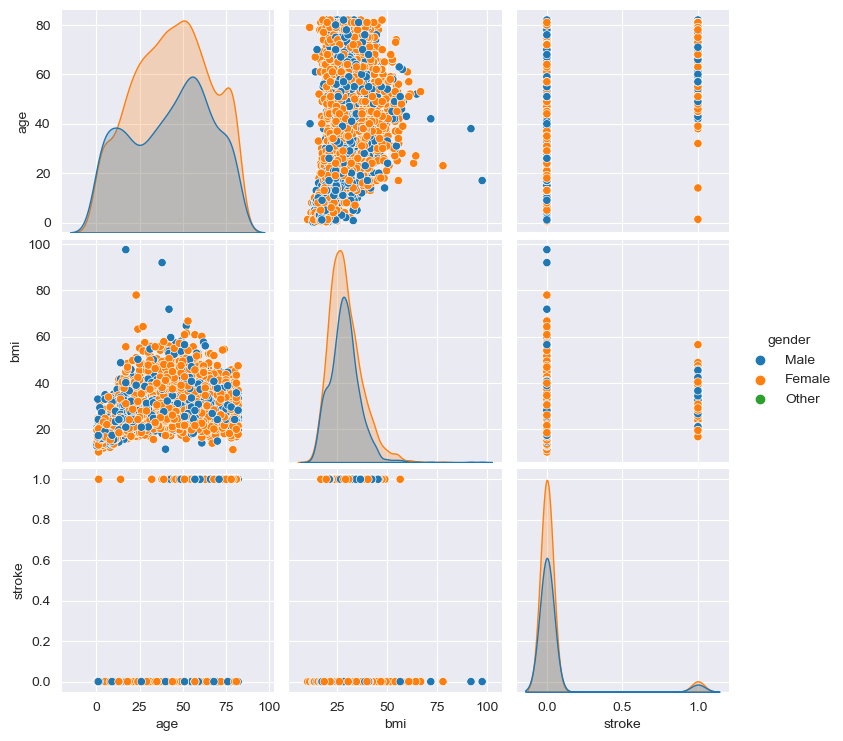

In [377]:
gender_counts = strokeData["gender"].value_counts()
print(gender_counts)
subset = strokeData.loc[:,["gender","age", "bmi", "stroke"]]
sns.pairplot(subset,hue = "gender")
plt.show()

### Question 3: What is the average age of individuals who had a stroke? Is there a significant age difference between individuals with and without strokes?
From the boxplot below we can see the average age who had a stroke is around 70 years old.The average age without stroke is around 40. So it is a significant age difference between individuals with and without strokes.

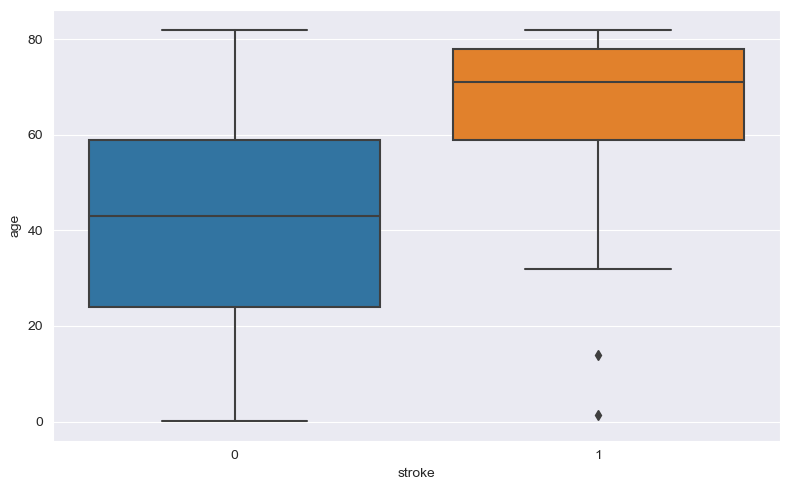

In [378]:
plt.figure(figsize=(8, 5)) 
sns.boxplot(x="stroke", y="age",  data=strokeData)
plt.tight_layout()
plt.show()